<a href="https://colab.research.google.com/github/MisGall10/Practica_25_Misael_Gallardo/blob/main/Practica25MAGC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practica # 25: Validación, Evaluación y Selección**

**Objetivo:** Aplicar de forma integral el proceso de entrenamiento, ajuste y evaluación de un clasificador tipo Árbol de Decisión sobre un conjunto de datos grande, aplicando técnicas robustas de validación cruzada y optimización de hiperparámetros.

**Dataset sugerido:**

Usa el conjunto de datos Glioma Grading Clinical and Mutation Features. Este conjunto de datos lo puedes encontrar en https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. Carga de Bibliotecas, Conjunto de Datos y Análisis Exploratorio de los Datos**

* Declarar las bibliotecas necesarias para este proyecto
* Cargar el conjunto de datos Glioma Grading Clinical and Mutation Features. Se puede descargar de https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset

In [18]:
#Cargamos las bibliotecas necesarias para el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, LeaveOneOut, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.tree import export_text
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
#Cargamos el data set
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/Programacion/Unidad03/TCGA_InfoWithGrade.csv')
#Convertimos todas las columnas/variables a enteros
df = df.astype(int)


# **2. 📊 Análisis exploratorio de datos (EDA)**

Realiza un análisis inicial de los datos antes de modelar:

  * Describir forma y estructura (`shape, describe(), info()`).

  * Mostrar la distribución de clases (`y.value_counts()`).

  * Visualizar:

    * Histograma de al menos **3 variables numéricas**.

    * Boxplots o violin plots por clase si es computacionalmente viable.

    * Mapa de calor de correlaciones entre variables.

🧠 Reflexiona:

* ¿Existen clases desbalanceadas?

No, los datos estan aparente balanceados, pues no encontramos relacion mayores a 10 a 1 o algo parecido.

* ¿Qué atributos parecen más informativos?

Basado en la naturaleza del tipo de dato, las columnas de Genero (Gender), Año del diagnostico (Age_at_diagnosis) y Raza (Race) nos dan algo de informacion aparentemente importante, pero analizando la matriz de correlacion y el mapa de calot podemo notar varias relaciones entre variables importantes como lo son los de los atributos: IDH1, TP53, ATRX, FUBP1, CIC entre otros.

In [19]:
#Analisis inicial
print('Tamaño del data set (Filas, Columnas):')
print(df.shape)
print('\nAnalisis estadisticos de las columnas:')
print(df.describe())
print('\nAnalisis de los tipos de datos de las columnas:')
print(df.info())

Tamaño del data set (Filas, Columnas):
(839, 24)

Analisis estadisticos de las columnas:
            Grade      Gender  Age_at_diagnosis        Race        IDH1  \
count  839.000000  839.000000        839.000000  839.000000  839.000000   
mean     0.419547    0.418355         50.446961    0.107271    0.481526   
std      0.493779    0.493583         15.712565    0.369392    0.499957   
min      0.000000    0.000000         14.000000    0.000000    0.000000   
25%      0.000000    0.000000         38.000000    0.000000    0.000000   
50%      0.000000    0.000000         51.000000    0.000000    0.000000   
75%      1.000000    1.000000         62.000000    0.000000    1.000000   
max      1.000000    1.000000         89.000000    3.000000    1.000000   

             TP53        ATRX        PTEN        EGFR         CIC  ...  \
count  839.000000  839.000000  839.000000  839.000000  839.000000  ...   
mean     0.414779    0.258641    0.168057    0.133492    0.132300  ...   
std      0.49

In [20]:
#Mostramos la distribución de clases (y.value_counts())
y = df['Grade']
print('Distribucion de los diagnosticos (0 = "LGG"; 1 = "GBM):')
print(y.value_counts())

Distribucion de los diagnosticos (0 = "LGG"; 1 = "GBM):
Grade
0    487
1    352
Name: count, dtype: int64


Interpretacion del valor de cada variable analizada:

Gender (0 = "male"; 1 = "female")
Age at diagnosis with the calculated number of days
Race (0 = "white"; 1 = "black or african American"; 2 = "asian"; 3 = "american indian or alaska native")



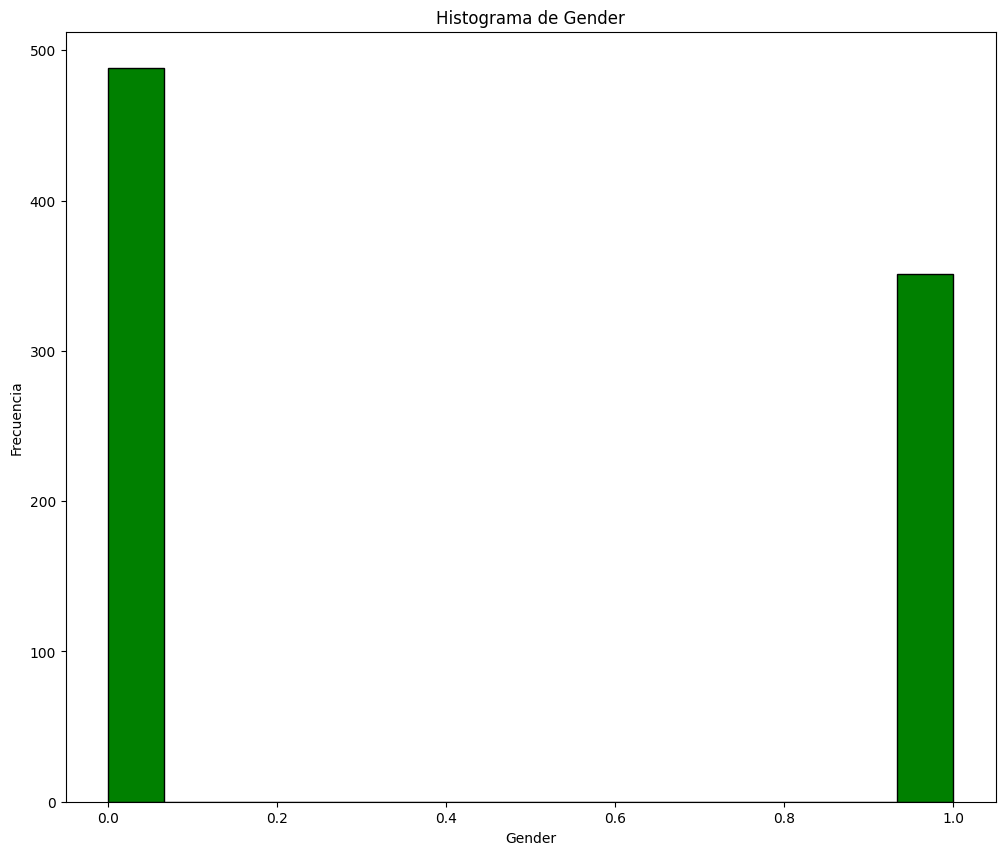

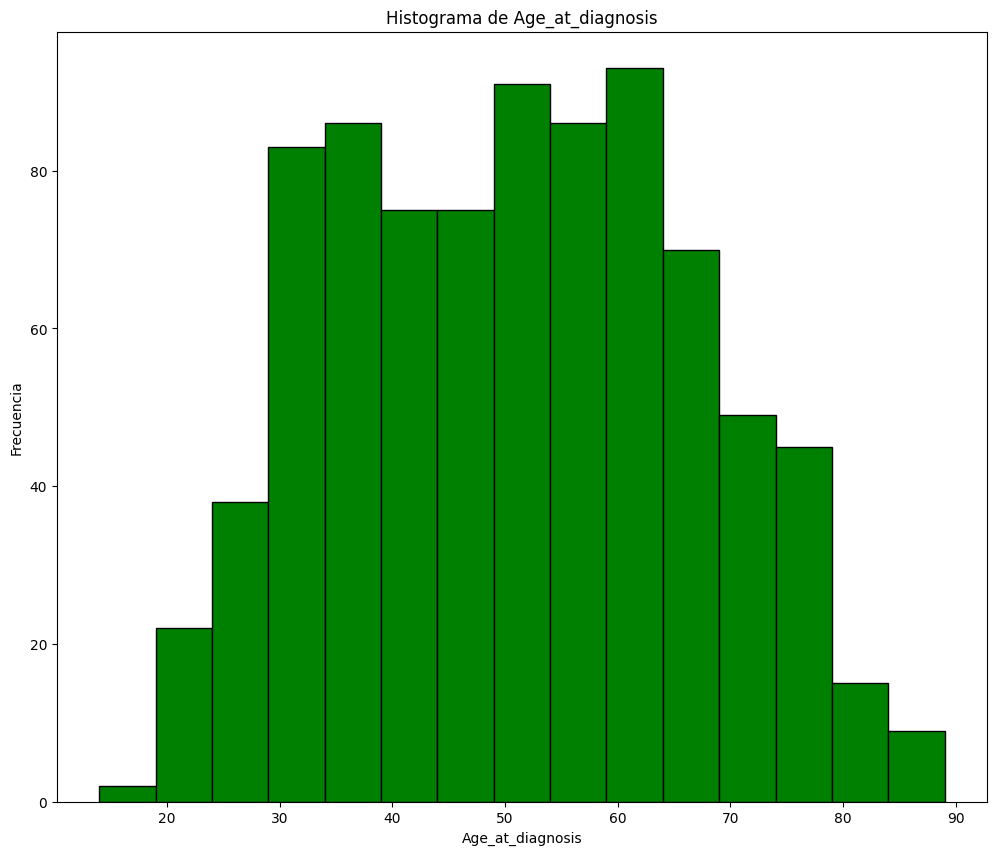

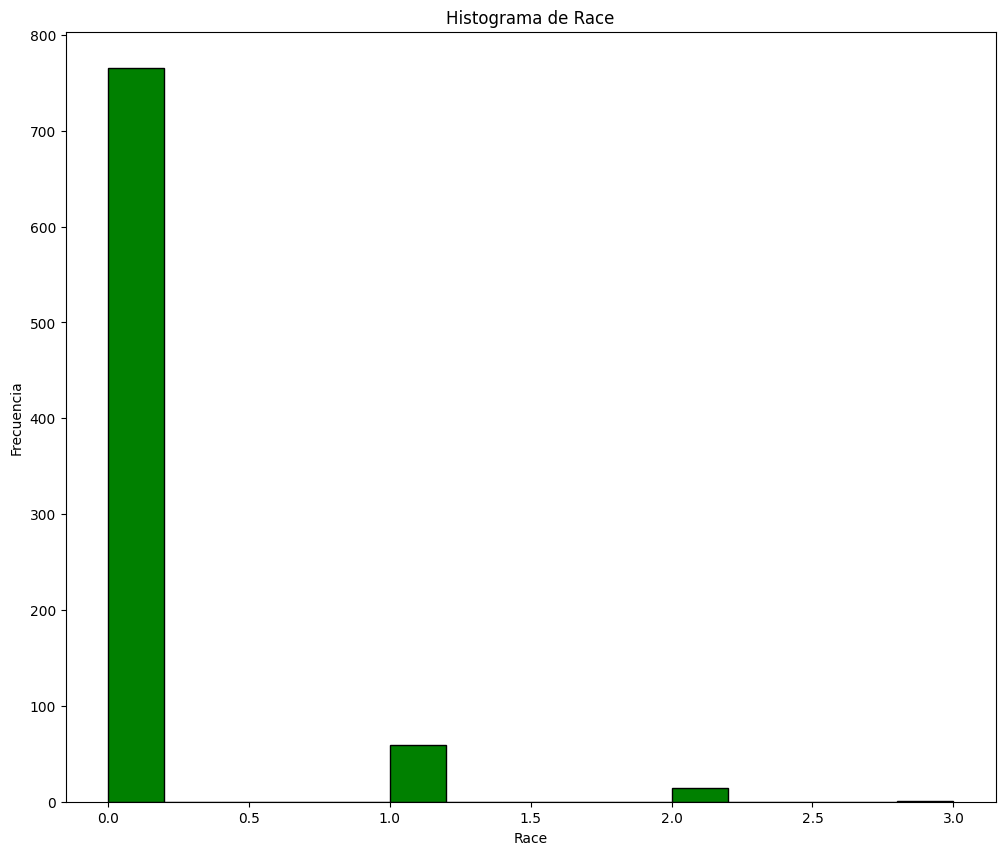

In [21]:
#Visualizamos los datos
#Histograma de al menos 3 variables numericas
variables_num = ['Gender','Age_at_diagnosis','Race']
print('Interpretacion del valor de cada variable analizada:\n')
print('Gender (0 = "male"; 1 = "female")')
print('Age at diagnosis with the calculated number of days')
print('Race (0 = "white"; 1 = "black or african American"; 2 = "asian"; 3 = "american indian or alaska native")\n')
for var in variables_num:
    plt.figure(figsize=(12, 10))
    plt.hist(df[var], bins=15, color='green', edgecolor='black')
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

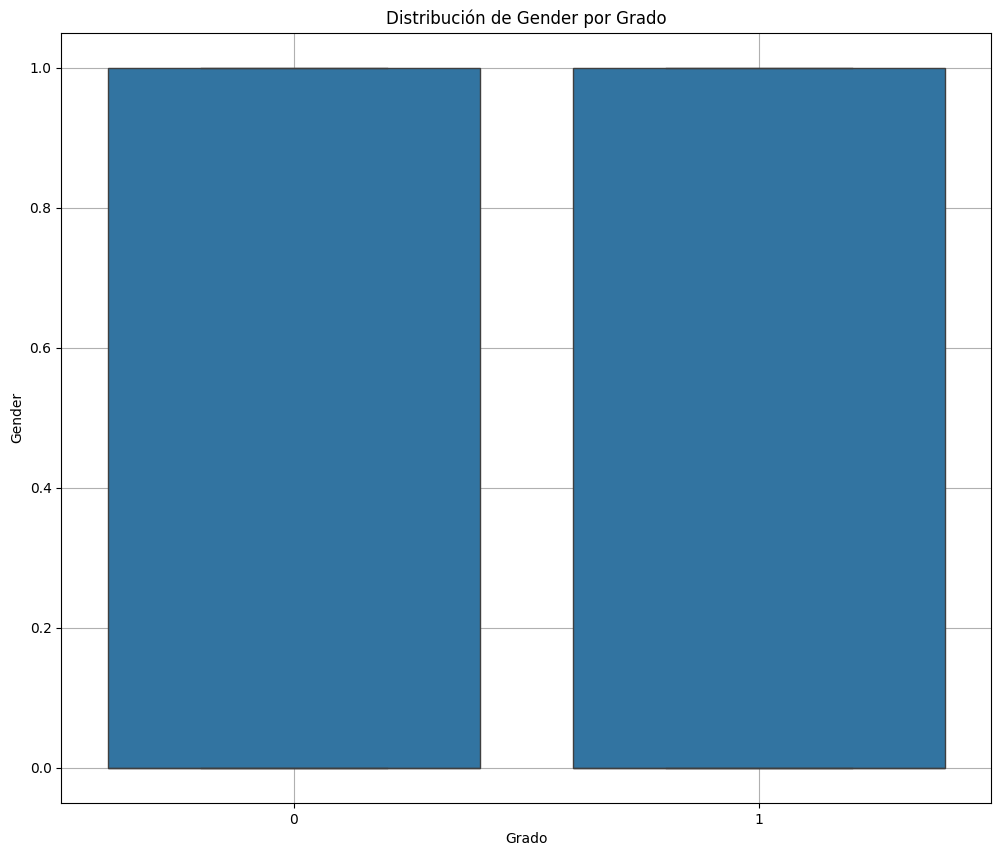

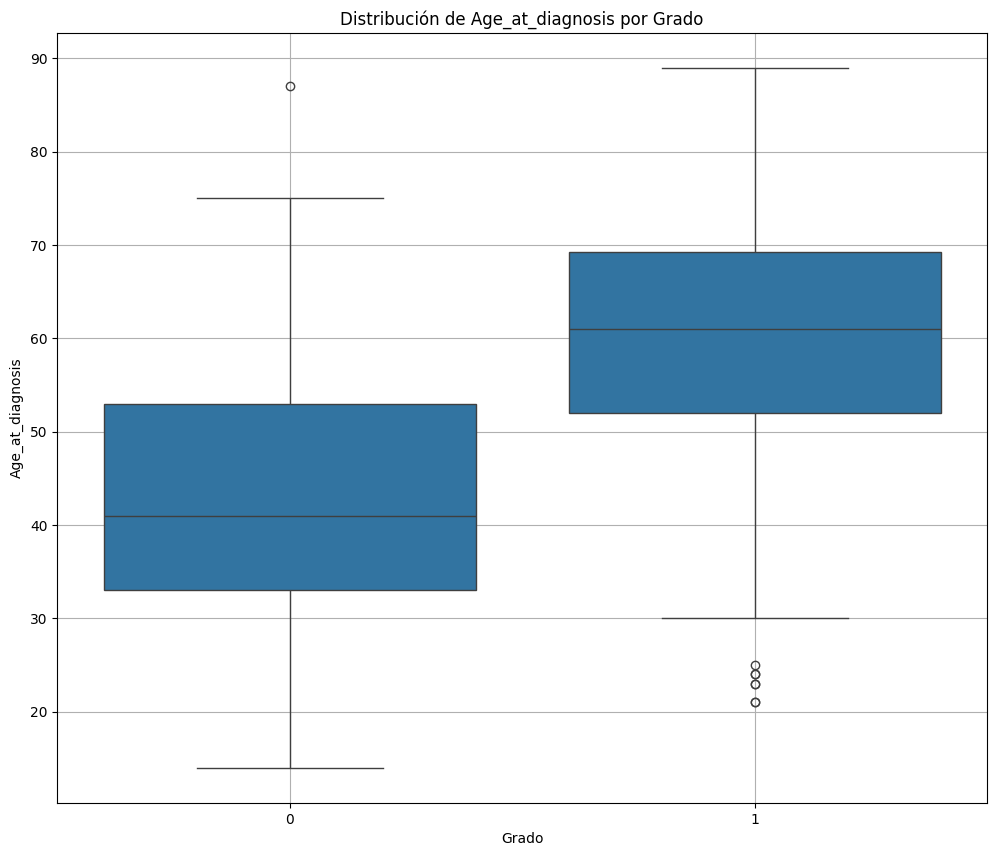

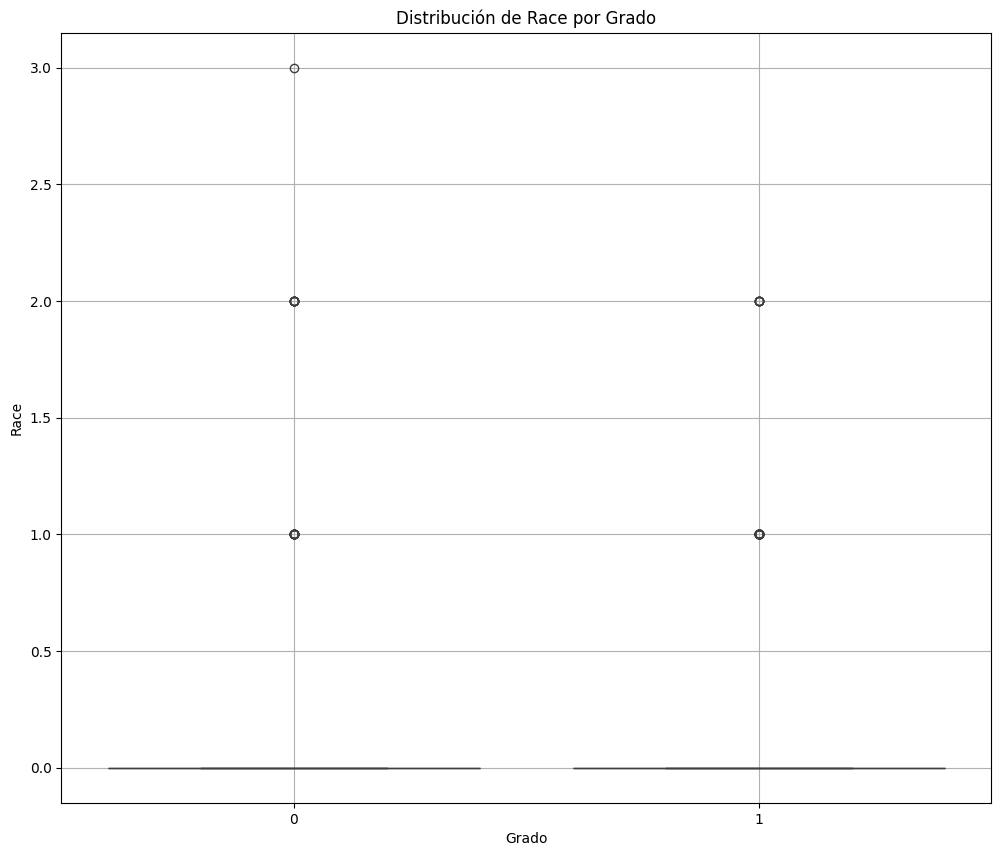

In [22]:
#Boxplots por clase de las ultimas 3 variables numericas
for var in variables_num:
    plt.figure(figsize=(12, 10))
    sns.boxplot(data=df, x='Grade', y=var)
    plt.title(f'Distribución de {var} por Grado')
    plt.xlabel('Grado')
    plt.ylabel(var)
    plt.grid(True)
    plt.show()


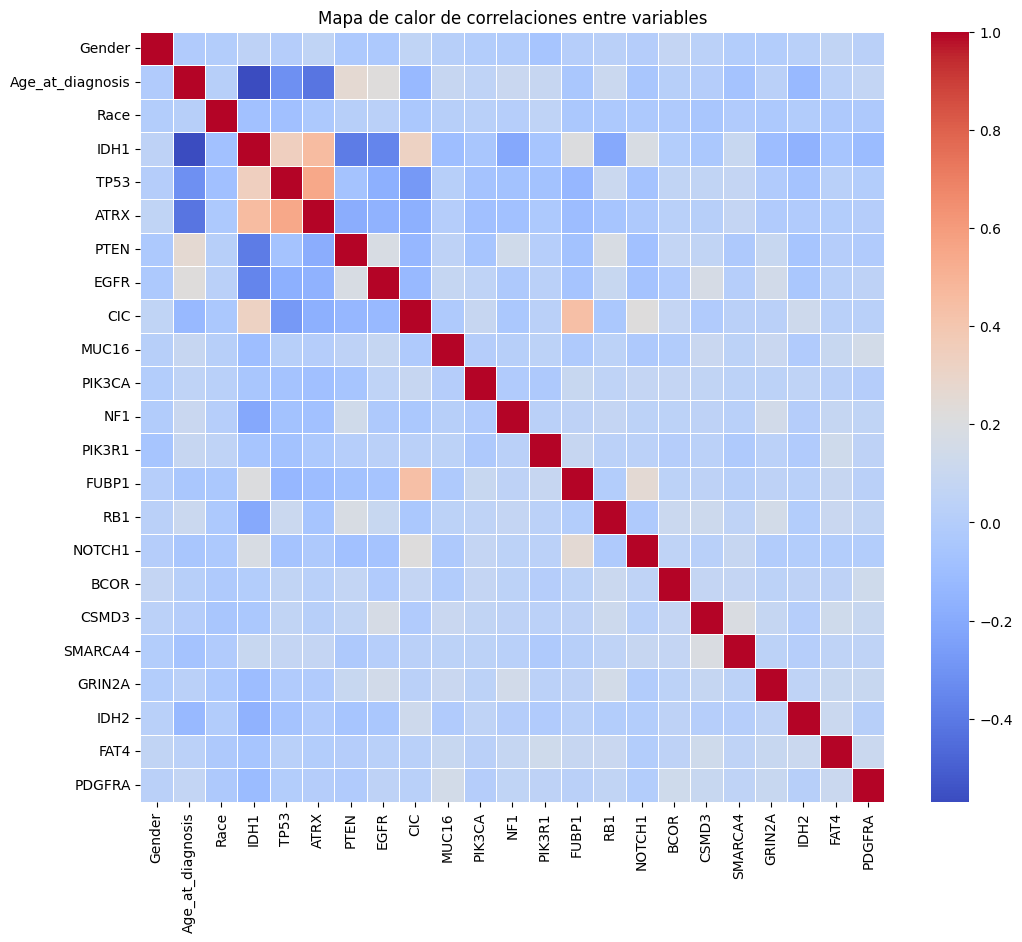

In [23]:
#Mapa de calor de correlaciones entre variables
#Declaramos X como solo las variables que no son Grade (target)
X = df.drop('Grade', axis=1)
corr = x.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm',linewidths=0.5)
plt.title("Mapa de calor de correlaciones entre variables")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# **3. Gráfica de Errores en Entrenamiento y Prueba**

* En este ejercicio vas a entrenar un árbol de decisión con diferentes profundidas. Asimismo, en gráfica mostrarás las exactitudes en entrenamiento y test, usando un stratified k-fold cross-validation con K= 10
* Los valores de las profundides a evaluar son 2, 5, 10, 15, 20, 25, 30 y None
* Deberás usar StratifiedKFold con 10 particiones, y un valor aleaotorio de 3
* Entrenarás y evaluarás un árbol de decisión con estos distintos valores de profundidades
* Usa `cross_val_score` para entrenar los modelos, usando como métrica de evaluación en `scoring ="f1_macro",y el StratifiedKFold`, con un valor aleatorio = 7
* Muestra una Gráfica para los distintos resultados  cuando se usa F1 Macro

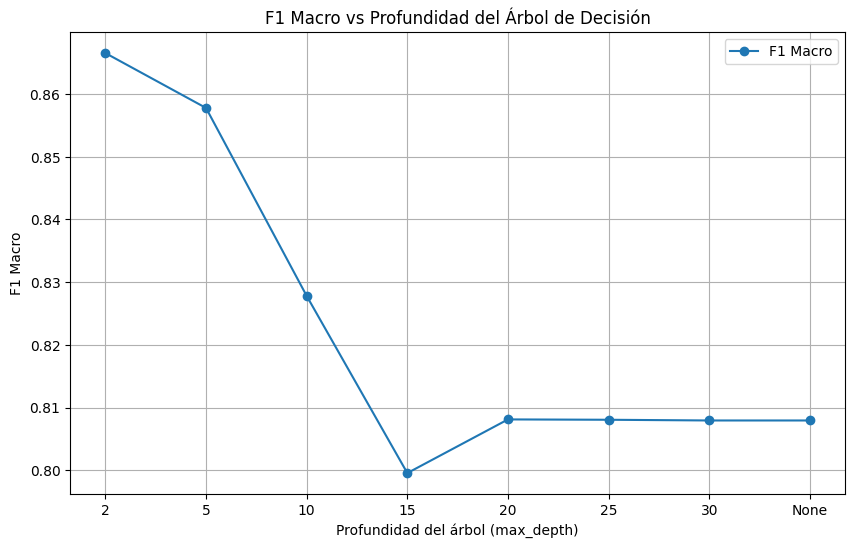

In [42]:
#Entremaos con un arbol de desicion a diferentes profundidadedes7
#Creamos slas listas para guardar los valores de F1 Macro
f1_macro_scores = []
#Entrenamos el modelo con diferentes profundidades
depths = [2, 5, 10, 15, 20, 25, 30, None]
#Definimos K = 10, usando StratifiedKFold y un valor aleatorio de 3
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)
#Aplicamos un ciclo for para realizar las predicciones
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=7)
    scores = cross_val_score(clf, X, y, cv=skf, scoring='f1_macro')
    f1_macro_scores.append(np.mean(scores))
#Gradicamos los resultados
plt.figure(figsize=(10, 6))
plt.plot([str(d) for d in depths], f1_macro_scores, label="F1 Macro", marker='o')
plt.xlabel("Profundidad del árbol (max_depth)")
plt.ylabel("F1 Macro")
plt.title("F1 Macro vs Profundidad del Árbol de Decisión")
plt.legend()
plt.grid(True)
plt.show()

# **4. Optimización de hiperparámetros con `RandomizedSearchCV`**

* Define el espacio de búsqueda aleatorio para los siguientes hiperpárametros:
  * `Criterion` = gini ,entropy
  * `max_depth`: de 5 a 50 con incrementos de 1
  * `min_samples_split`: de 2 a 20 con incrementos de 1
* Usa el árbol de decisión
* `StratifiedKfold = 10` (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
* `n_iter = 5` (combinaciones aleatorias a buscar)
* `n_jobs = -1` para acelerar cómputo
* Métrica de evaluación: f1 Macro
* Imprime los mejores hiperparámetros encontrados
* Imprime el `best_score`

In [30]:
#Definimos espacio de búsqueda
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(5,51)),
    'min_samples_split': list(range(2,21))
}
#Usamos un arbol de desicion
clf = DecisionTreeClassifier(random_state=42)
#Usamos StratifiesKFold = 10
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#Definimos la busqueda aleatoria con
random_search = RandomizedSearchCV(
    clf,
    param_distributions=param_dist,
    n_iter=5, #5 iteraciones
    scoring='f1_macro', #Metrica de evaluacion
    cv=skf,
    n_jobs=-1,#Para acelerar computo
    random_state=42
)
#Ajustamos la búsqueda aleatoria a los datos
random_search.fit(X, y)
#Imprimimos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:", random_search.best_params_)
#Imprimimos el mejor puntaje (f1_macro) encontrado
print("Mejor score (f1_macro):", random_search.best_score_)

Mejores hiperparámetros encontrados: {'min_samples_split': 17, 'max_depth': 35, 'criterion': 'entropy'}
Mejor score (f1_macro): 0.833364045999834


# **5. Optimización de hiperparámetros con `GridSearchCV`**

* Define el espacio de búsqueda  para los siguientes hiperpárametros:
  * `Criterion = gini ,entropy`
  * `max_depth`: de 5 a 50 con incrementos de 1
  * `min_samples_split`: de 2 a 20 con incrementos de 1
* Usa el árbol de decisión
* `StratifiedKfold = 10` (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
* Métrica de evaluación: f1 Macro
* `n_jobs = -1` para acelerar cómputo
* Imprime los mejores hiperparámetros encontrados
* Imprime el best_score

In [39]:
#Definimos espacio de búsqueda
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(5,51)),
    'min_samples_split': list(range(2,21))
}
#Usamos un arbol de desicion
clf = DecisionTreeClassifier(random_state=42)
#Usamos StratifiesKFold = 10
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#Definimos la busqueda aleatoria con
grid_search = GridSearchCV(
    estimator = clf,
    param_grid = param_grid,
    cv=skf,
    scoring='f1_macro', #Metrica de evaluacion f1 Macro
    n_jobs=-1 #Para a acelerar computo
)
#Ajustamos la búsqueda aleatoria a los datos
grid_search.fit(X, y)
#Imprimimos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
#Imprimimos el mejor puntaje (f1_macro) encontrado
print("Mejor score (f1_macro):", grid_search.best_score_)

Mejores hiperparámetros encontrados: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 11}
Mejor score (f1_macro): 0.8677610470702989


# **6. Optimización de hiperparámetros con `RandomizedSearchCV: Accuracy`**

* Define el espacio de búsqueda aleatorio para los siguientes hiperpárametros:
  * `Criterion = gini ,entropy`
  * `max_depth`: de 5 a 50 con incrementos de 1
  * `min_samples_split`: de 2 a 20 con incrementos de 1
* Usa el árbol de decisión
* `StratifiedKfold = 10` (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
* `n_iter = 5` (combinaciones aleatorias a buscar)
* `n_jobs = -1` para acelerar cómputo
* Métrica de evaluación: accuracy
* Imprime los mejores hiperparámetros encontrados
* Imprime el `best_score`

In [35]:
#Definimos espacio de búsqueda
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(5,51)),
    'min_samples_split': list(range(2,21))
}
#Usamos un arbol de desicion
clf = DecisionTreeClassifier(random_state=42)
#Usamos StratifiesKFold = 10
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#Definimos la busqueda aleatoria con
random_search = RandomizedSearchCV(
    estimator = clf,
    param_distributions=param_dist,
    n_iter=5, #5 iteraciones
    scoring='accuracy', #Metrica de evaluacion
    cv=skf,
    n_jobs=-1,#Para acelerar computo
    random_state=42
)
#Ajustamos la búsqueda aleatoria a los datos
random_search.fit(X, y)
#Imprimimos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:", random_search.best_params_)
#Imprimimos el mejor puntaje (f1_macro) encontrado
print("Mejor score (accuracy):", random_search.best_score_)

Mejores hiperparámetros encontrados: {'min_samples_split': 17, 'max_depth': 35, 'criterion': 'entropy'}
Mejor score (accuracy): 0.8379231210556511


# **7. Optimización de hiperparámetros con `GridSearchCV: accuracy`**

* Define el espacio de búsqueda  para los siguientes hiperpárametros:
  * `Criterion = gini ,entropy`
  * `max_depth`: de 5 a 50 con incrementos de 1
  * `min_samples_split`: de 2 a 20 con incrementos de 1
* Usa el árbol de decisión
* `StratifiedKfold = 10` (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
* Métrica de evaluación: f1 Macro
* `n_jobs = -1` para acelerar cómputo
* Imprime los mejores hiperparámetros encontrados
* Imprime el `best_score`


In [41]:
#Definimos espacio de búsqueda
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(5,51)),
    'min_samples_split': list(range(2,21))
}
#Usamos un arbol de desicion
clf = DecisionTreeClassifier(random_state=42)
#Usamos StratifiesKFold = 10
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#Definimos la busqueda aleatoria con
grid_search = GridSearchCV(
    estimator = clf,
    param_grid = param_grid,
    cv=skf,
    scoring='accuracy', #Metrica de evaluacion Accuracy
    n_jobs=-1 #Para a acelerar computo
)
#Ajustamos la búsqueda aleatoria a los datos
grid_search.fit(X, y)
#Imprimimos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
#Imprimimos el mejor puntaje (f1_macro) encontrado
print("Mejor score (f1_macro):", grid_search.best_score_)

Mejores hiperparámetros encontrados: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 11}
Mejor score (f1_macro): 0.8688898450946644


# **8.Actividad de reflexión y análisis**

* ¿Cuál método encontró mejores hiperparámetros?

Basado en los resultados, considero que los mejores hiperparametros son los que se toman directamente de GridSearch ya que, a pesar de tener un gran costo computacional, este explora todas las alternativas de la lista de hiperparametros que definimos y no solo unas muestra de ellas como lo hace RandomSearch.

* ¿Cuál fue más costoso computacionalmente?

Por mucho (2m) al menos en tiempo los mas costosos fueron las busquedas de hiperparametros con GridSearch.

* ¿Los resultados en `f1_macro set` fueron distintos en ambos métodos de optimización? ¿Por qué?

Si el principal motivo se debe a que con GridSearch buscamos los mejores parametros evaluando todos los modelos que le damos, y con RandomSearch hacemos solo 5 iteraciones de combinaciones de todo el espacio que definimos.

* ¿Los resultados en` accuracy set` fueron distintos en ambos métodos de optimización? ¿Por qué?

Si basicamente por lo mismo que paso con el f1 macro, ambos metodos de validacion utulizan formas diferentes de trabajar lo cual nos entrega diferentes resultados

* ¿Los valores de hiperpárametros fueron iguales en Accuracy y F1 Macro?

Si fueron iguales y/o muy parecido especificamente entre los hiperparametros de sus respectivos grupos, es decir: tanto para las evaluaciones de GridSearch (F1 Macro y accuracy) tuvimos los mismo valores de hiperparametros y Sucede lo mismo para los hiperparametros de RandomSearch.